# Documentation
* I decided to use the dataset from my previous assignment.
* Please check previous assignment for documentation.

# Create DataFrame

In [4]:
import pandas as pd
chocolate = pd.read_csv("../data/raw/chocolate_bars.csv")
chocolate

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


# Using the data
* I'd like to do some cleaning for the data, and ask a new question (see below).

In [5]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


### Filling in missing values
* I notice that the 'num_ingredients' and 'ingredients' columns have missing values
* I'll replace NaN with 0 and 'None' for the two columns respectively

In [9]:
values = {'num_ingredients': 0, 'ingredients': 'None'}
chocolate.fillna(value = values, inplace=True)
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2530 non-null   float64
 8   ingredients       2530 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


### Type conversion
* I also notice that the data type for 'num_ingredients' is float64. I'd like to convert it to int64

In [14]:
chocolate = chocolate.astype({'num_ingredients': 'int64'})
chocolate.dtypes

id                    int64
manufacturer         object
company_location     object
year_reviewed         int64
bean_origin          object
bar_name             object
cocoa_percent       float64
num_ingredients       int64
ingredients          object
review               object
rating              float64
dtype: object

### Visualization
* I found some keywords in the 'review' column, and I'm curious about what keywords associate with higher ratings
* I select 5 keywords that I'm interested in: fruit (or fruity), sweet, sandy, cream (creamy), and nutty

In [27]:
# filter the chocolate dataframe, and store subgroups into new dataframes
fruit = chocolate[chocolate['review'].str.contains('fruit')]
sweet = chocolate[chocolate['review'].str.contains('sweet')]
sandy = chocolate[chocolate['review'].str.contains('sandy')]
cream = chocolate[chocolate['review'].str.contains('cream')]
nutty = chocolate[chocolate['review'].str.contains('nutty')]

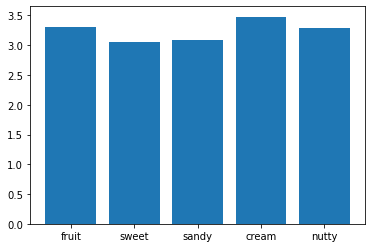

In [31]:
# calculate the average rating of those subgroups
keywords = ['fruit', 'sweet', 'sandy', 'cream', 'nutty']
ratings = []
ratings.append(fruit['rating'].mean())
ratings.append(sweet['rating'].mean())
ratings.append(sandy['rating'].mean())
ratings.append(cream['rating'].mean())
ratings.append(nutty['rating'].mean())

# draw a plot to see the association
import matplotlib.pyplot as plt
plt.bar(keywords, ratings)
plt.show()

* According to the bar chart, 'cream' seems to associate with higher ratings, while 'sweet' and 'sandy' associate with lower ratings
* But what about the statistics summary of the 5 keywords subgroups? Do they have similar statistics features?

### Calculate summary statistics

In [45]:
# combine the summary statistics of the ratings of the 5 keyword subgroups into a new dataframe
stat = pd.DataFrame([fruit['rating'].describe(), sweet['rating'].describe(), sandy['rating'].describe(), cream['rating'].describe(), nutty['rating'].describe()], index=keywords)
stat

,count,mean,std,min,25%,50%,75%,max
fruit,334.0,3.309132,0.403233,1.50,3.00,3.25,3.50,4.00
sweet,318.0,3.055818,0.361044,2.00,2.75,3.00,3.25,4.00
sandy,173.0,3.095376,0.368066,2.00,2.75,3.00,3.50,3.75
cream,198.0,3.478535,0.425079,1.50,3.25,3.50,3.75,4.00
nutty,278.0,3.288669,0.392377,1.75,3.00,3.25,3.50,4.00


* First of all, the sample sizes of the 5 subgroups have huge differences. The sample size of 'sandy' subgroup is only about half of the 'fruit' subgroup;
* Secondly, the 'cream' subgroup has the highest std as well as the highest average rating; it also has the largest dispersion in terms of percentiles;
* In addition, higher average ratings seem to correlate with higher std. 'Cream' subgroup is in 1st place for both mean and std. 'Fruit' subgroup is in 2nd place for both mean and std. 'Nutty' subgroup is in 3rd place for both mean and std. This pattern is kept for all 5 subgroups. 
* Therefore, the differences in sample size and data dispersion may influence the previous results. We should be suspicious of the result and further examine the data by p-values or other tests.